In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, InputLayer, Flatten, BatchNormalization, Layer, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Model
import tensorflow_probability as tfp

In [ ]:
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True)

In [ ]:
# Creating a function for dataset split
def dataset_split(dataset, train_ratio, test_ratio, val_ratio):
  '''
  This function use to split dataset into train, test and validation dataset.
  And it's returns train, test, validation datasets.
  Arg:
    dataset: the dataset you have.
    train ratio: train dataset ratio between 0-1 where 1 represent 100%.
    test ratio: test dataset ratio 0-1.
    val_ration: validation data ratio 0-1.

  '''
  #main_dataset
  #print(list(dataset.as_numpy_iterator()))
  dataset_size = len(dataset)

  # for training dataset
  train_dataset = dataset.take(int(dataset_size*train_ratio))
  #print(list(train_dataset.as_numpy_iterator()))

  # for test dataset
  test_dataset_list = dataset.skip(int(dataset_size * train_ratio))
  test_dataset = test_dataset_list.take(int(dataset_size * test_ratio))
  #print(list(test_dataset_list.as_numpy_iterator()))
  #print(list(test_dataset.as_numpy_iterator()))

  # For validation dataset
  val_dataset = test_dataset_list.skip(int(dataset_size * test_ratio))
  #print(list(val_dataset.as_numpy_iterator()))

  return train_dataset, test_dataset, val_dataset

In [ ]:
# Calling the dataset_split function
train_dataset, test_dataset, val_dataset = dataset_split(dataset['train'], train_ratio=.7, test_ratio=.15, val_ratio=.15)

In [ ]:
for data in train_dataset.take(2):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(115, 157, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [ ]:
train_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

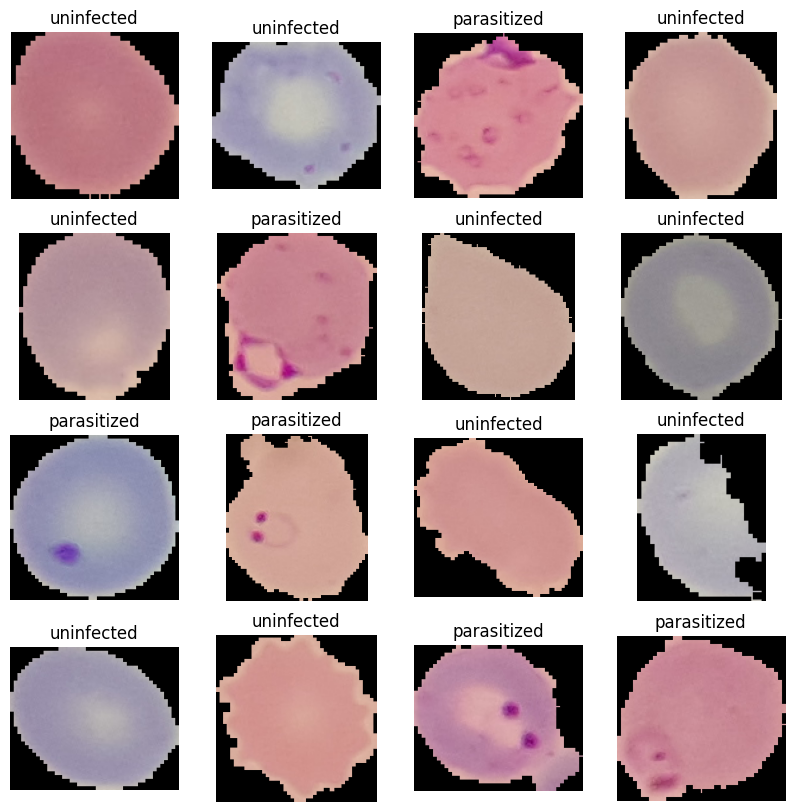

In [ ]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_dataset.take(16)):
  plt.subplot(4, 4, i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [ ]:
img_size = 224
# creating a function for resize and rescale dataset
def resize_rescale(image, label):
  return tf.image.resize(image, (img_size, img_size))/255.0, label

Model_Creation

In [ ]:
class FeatureExtractor(Layer):
  def __init__(self, filters, kernel_size, strides, padding, activation, pool_size):
    super(FeatureExtractor, self).__init__()

    self.Conv2D_1 = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
    self.batch_normalization_1 = BatchNormalization()
    self.MaxPool2D_1 =  MaxPool2D(pool_size=pool_size, strides=2*strides)

    self.Conv2D_2 = Conv2D(filters=2*filters, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
    self.batch_normalization_2 = BatchNormalization()
    self.MaxPool2D_2 =  MaxPool2D(pool_size=pool_size, strides=2*strides)


  def call(self, x):
    x = self.Conv2D_1(x)
    x = self.batch_normalization_1(x)
    x = self.MaxPool2D_1(x)

    x = self.Conv2D_2(x)
    x = self.batch_normalization_2(x)
    x = self.MaxPool2D_2(x)
    return x
feature_sub_classed = FeatureExtractor(8, 3, 1, "valid", "relu", 2)


In [ ]:
class LenetModel(Model):
  def __init__(self):
    super(LenetModel, self).__init__()

    self.feature_extractor = FeatureExtractor(8, 3, 1, "valid", "relu", 2)
    self.flatten = Flatten()
    self.dense_1 = Dense(100, activation = 'relu')
    self.batch = BatchNormalization()
    self.dense_2 = Dense(10, activation = 'relu')
    self.batch_2 = BatchNormalization()
    self.dense_3 = Dense(1, activation = 'sigmoid')

  def call(self, x):
    x = self.feature_extractor(x)
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.batch(x)
    x = self.dense_2(x)
    x = self.batch_2(x)
    x = self.dense_3(x)

    return x

lenet_subclass_model = LenetModel()
lenet_subclass_model(tf.zeros([1, 224, 224, 3]))
lenet_subclass_model.summary()

Model: "lenet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_1 (Featu  multiple                  1488      
 reExtractor)                                                    
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  4665700   
                                                                 
 batch_normalization_4 (Bat  multiple                  400       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             multiple                  1010      
                                                                 
 batch_normalization_5 (Bat  multiple                  

Custom Loss Method

In [ ]:
def custom_bce(FACTOR):
  def t_loss(y_true, y_pred):
    bce = BinaryCrossentropy()
    return bce(y_true, y_pred) * FACTOR

  return t_loss

Custom Loss class

In [ ]:
class CustomBCE(tf.keras.losses.Loss):
  def __init__(self, FACTOR):
    super(CustomBCE, self).__init__()
    self.FACTOR = FACTOR

  def call(self, y_true, y_pred):
    bce = BinaryCrossentropy()
    return bce(y_true, y_pred) * FACTOR


Custom Accuracy Method

In [ ]:
from tensorflow.keras.metrics import binary_accuracy
def custom_accuracy(FACTOR=100):
  def metric(y_true, y_pred):
    return binary_accuracy(y_true, y_pred) * FACTOR
  return metric

In [ ]:
# Compile the model
FACTOR = 1
lennet_model = LenetModel()
lennet_model.compile(
    optimizer = Adam(),
    loss = CustomBCE(FACTOR),
    metrics = custom_accuracy()
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

In [ ]:
BATCH_SIZE = 32

In [ ]:
train_dataset = (train_dataset
                 .shuffle(buffer_size=1024, )
                 .map(resize_rescale, num_parallel_calls=tf.data.AUTOTUNE)
                 .batch(BATCH_SIZE)
                 .prefetch(tf.data.AUTOTUNE))
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
val_dataset = (val_dataset
               #.shuffle(buffer_size=4096, )
               .map(resize_rescale, num_parallel_calls=tf.data.AUTOTUNE)
               .batch(BATCH_SIZE)
               .prefetch(tf.data.AUTOTUNE))
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

Train The Model


In [ ]:
lennet_model_experiment = lennet_model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 5
)

Epoch 1/5
603/603 [==============================] - 43s 65ms/step - loss: 0.3970 - metric: 81.5293 - val_loss: 1.0240 - val_metric: 68.4643
Epoch 2/5
603/603 [==============================] - 45s 75ms/step - loss: 0.2200 - metric: 91.9907 - val_loss: 0.3030 - val_metric: 90.4716
Epoch 3/5
603/603 [==============================] - 38s 63ms/step - loss: 0.1834 - metric: 93.2919 - val_loss: 0.2600 - val_metric: 91.8259
Epoch 4/5
603/603 [==============================] - 39s 63ms/step - loss: 0.1460 - metric: 94.8263 - val_loss: 0.2571 - val_metric: 93.1076
Epoch 5/5
603/603 [==============================] - 39s 64ms/step - loss: 0.1295 - metric: 95.2981 - val_loss: 2.0854 - val_metric: 47.5695


Mixup augmentation

In [ ]:
train_dataset_1 = train_dataset.shuffle(buffer_size=4096,).map(resize_rescale, num_parallel_calls = tf.data.AUTOTUNE)
train_dataset_2 = train_dataset.shuffle(buffer_size=4096,).map(resize_rescale, num_parallel_calls = tf.data.AUTOTUNE)
mixed_dataset = tf.data.Dataset.zip(train_dataset_1, train_dataset_2)

In [ ]:
def mixup_augmentation(train_dataset_1, train_dataset_2):
  (image_1, label_1), (image_2, label_2) = train_dataset_1, train_dataset_2
  lamda = tfp.distributions.Beta(0.2, 0.2)
  lamda = lamda.sample(1)[0]

  image = lamda * image_1 + (1-lamda)*image_2
  label = lamda * tf.cast(label_1, dtype=tf.float32) + (1-lamda)*tf.cast(label_2, dtype=tf.float32)

  return image, label


In [ ]:
val_dataset

<_SkipDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
val_dataset = val_dataset.shuffle(buffer_size=4096, ).map(resize_rescale, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset

<_ParallelMapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
def val_data_cast(val_dataset):
  image, label = val_dataset
  return image, tf.cast(label, dtype=tf.float32)

In [ ]:
BATCH_SIZE = 32
train_dataset = (
    mixed_dataset
    .shuffle(buffer_size = 1000, reshuffle_each_iteration = True)
    .map(mixup_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
val_dataset = (
    val_dataset
    #.shuffle(buffer_size = 4096, reshuffle_each_iteration = True)
    #.map(mixup_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
lennet_history = lennet_model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 30,
    callbacks = [early_stopping]
)

Epoch 1/30
603/603 [==============================] - 83s 117ms/step - loss: 0.3970 - accuracy: 0.4500 - val_loss: 0.3263 - val_accuracy: 0.8779
Epoch 2/30
603/603 [==============================] - 70s 107ms/step - loss: 0.3064 - accuracy: 0.4763 - val_loss: 0.2744 - val_accuracy: 0.9059
Epoch 3/30
603/603 [==============================] - 77s 116ms/step - loss: 0.2928 - accuracy: 0.4788 - val_loss: 0.2037 - val_accuracy: 0.9318
Epoch 4/30
603/603 [==============================] - 77s 115ms/step - loss: 0.2674 - accuracy: 0.4865 - val_loss: 0.1889 - val_accuracy: 0.9417
Epoch 5/30
603/603 [==============================] - 76s 115ms/step - loss: 0.2491 - accuracy: 0.4818 - val_loss: 0.2268 - val_accuracy: 0.9330
Epoch 6/30
603/603 [==============================] - 77s 119ms/step - loss: 0.2315 - accuracy: 0.4991 - val_loss: 0.2238 - val_accuracy: 0.9216
Epoch 7/30
603/603 [==============================] - 76s 114ms/step - loss: 0.2192 - accuracy: 0.4988 - val_loss: 0.2280 - val_ac

In [ ]:
train_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
val_dataset

<_ParallelMapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

<Axes: >

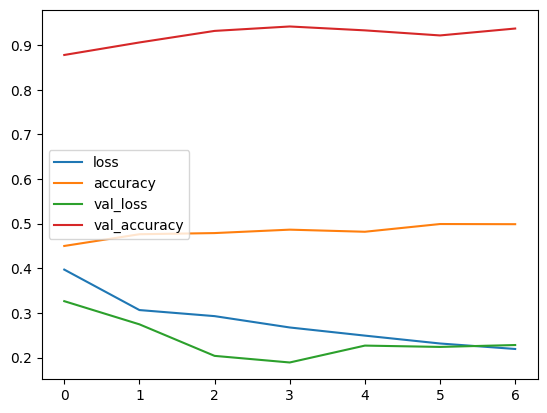

In [ ]:
import pandas as pd
pd.DataFrame(lennet_history.history).plot()

In [ ]:
img_size = 224
# creating a function for resize and rescale dataset
def resize(image):
  return tf.image.resize(image, (img_size, img_size))/255.

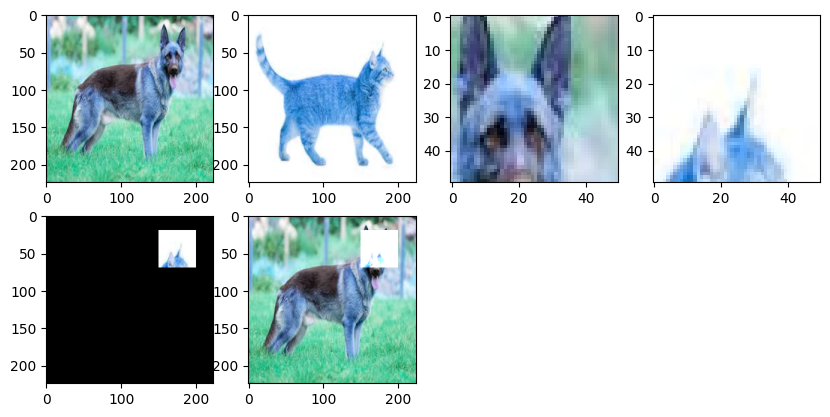

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

import cv2
plt.figure(figsize=(10, 10))
image_1 = cv2.imread('/content/dog.jpeg')
image_1 = resize(image_1)
plt.subplot(4, 4, 1)
plt.imshow(image_1)

image_2 = cv2.imread('/content/cat.jpeg')
image_2 = resize(image_2)

plt.subplot(4, 4, 2)
plt.imshow(image_2)

crop_1 = tf.image.crop_to_bounding_box(
    image_1, 20, 150, 50, 50
)
plt.subplot(4, 4, 3)
plt.imshow(crop_1)

crop_2 = tf.image.crop_to_bounding_box(
    image_2, 20, 150, 50, 50
)
plt.subplot(4, 4, 4)
plt.imshow(crop_2)

pad_1 = tf.image.pad_to_bounding_box(crop_2, 20, 150, img_size, img_size)
plt.subplot(4, 4, 5)
plt.imshow(pad_1)

plt.subplot(4, 4, 6)
plt.imshow(image_1 + pad_1)


In [ ]:
def box(lamda):

  r_x = tf.cast(tfp.distributions.Uniform(0, img_size).sample(1)[0], dtype = tf.int32)
  r_y = tf.cast(tfp.distributions.Uniform(0, img_size).sample(1)[0], dtype = tf.int32)

  r_w = tf.cast(img_size*tf.math.sqrt(1-lamda), dtype = tf.int32)
  r_h = tf.cast(img_size*tf.math.sqrt(1-lamda), dtype = tf.int32)

  r_x = tf.clip_by_value(r_x - r_w//2, 0, img_size)
  r_y = tf.clip_by_value(r_y - r_h//2, 0, img_size)

  x_b_r = tf.clip_by_value(r_x + r_w//2, 0, img_size)
  y_b_r = tf.clip_by_value(r_y + r_h//2, 0, img_size)

  r_w = x_b_r - r_x
  if(r_w == 0):
    r_w  = 1

  r_h = y_b_r - r_y
  if(r_h == 0):
    r_h = 1

  return r_y, r_x, r_h, r_w

In [ ]:
def cutmix(train_dataset_1, train_dataset_2):
  (image_1,label_1), (image_2, label_2) = train_dataset_1, train_dataset_2

  lamda = tfp.distributions.Beta(0.2,0.2)
  lamda = lamda.sample(1)[0]

  r_y, r_x, r_h, r_w = box(lamda)
  crop_2 = tf.image.crop_to_bounding_box(image_2, r_y, r_x, r_h, r_w)
  pad_2 = tf.image.pad_to_bounding_box(crop_2, r_y, r_x, img_size, img_size)

  crop_1 = tf.image.crop_to_bounding_box(image_1, r_y, r_x, r_h, r_w)
  pad_1 = tf.image.pad_to_bounding_box(crop_1, r_y, r_x, img_size, img_size)

  image = image_1 - pad_1 + pad_2

  lamda = tf.cast(1- (r_w*r_h)/(img_size*img_size), dtype = tf.float32)
  label = lamda*tf.cast(label_1, dtype = tf.float32) + (1-lamda)*tf.cast(label_2, dtype = tf.float32)

  return image, label


In [ ]:
BATCH_SIZE = 32
train_dataset = (
    mixed_dataset
    .shuffle(buffer_size = 1000, reshuffle_each_iteration = True)
    .map(cutmix, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
val_dataset = (
    val_dataset
    #.shuffle(buffer_size = 4096, reshuffle_each_iteration = True)
    #.map(mixup_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
lennet_history_cutmix = lennet_model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 30,
    callbacks = [early_stopping]
)

Epoch 1/30
603/603 [==============================] - 95s 134ms/step - loss: 0.5294 - accuracy: 0.4018 - val_loss: 0.3755 - val_accuracy: 0.8597
Epoch 2/30
603/603 [==============================] - 91s 139ms/step - loss: 0.4409 - accuracy: 0.4454 - val_loss: 0.3645 - val_accuracy: 0.8646
Epoch 3/30
603/603 [==============================] - 83s 128ms/step - loss: 0.4291 - accuracy: 0.4474 - val_loss: 0.2527 - val_accuracy: 0.9175
Epoch 4/30
603/603 [==============================] - 88s 135ms/step - loss: 0.4128 - accuracy: 0.4532 - val_loss: 0.3357 - val_accuracy: 0.9045
Epoch 5/30
603/603 [==============================] - 91s 141ms/step - loss: 0.4063 - accuracy: 0.4557 - val_loss: 0.2612 - val_accuracy: 0.9258
Epoch 6/30
603/603 [==============================] - 90s 138ms/step - loss: 0.4028 - accuracy: 0.4553 - val_loss: 0.3315 - val_accuracy: 0.8883
Epoch 7/30
603/603 [==============================] - 90s 139ms/step - loss: 0.3981 - accuracy: 0.4617 - val_loss: 0.2608 - val_ac

<Axes: >

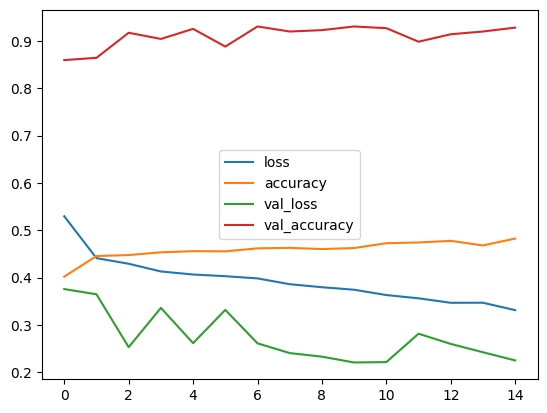

In [ ]:
import pandas as pd
pd.DataFrame(lennet_history_cutmix.history).plot()

tf.Tensor(
[0.0000000e+00 2.1703601e-02 2.4115115e-01 9.3062419e-01 9.8852038e-01
 9.8437500e-01 1.0000000e+00 1.2456179e-02 1.0000000e+00 0.0000000e+00
 7.5444436e-01 1.6761005e-02 9.9950176e-01 2.1556121e-01 1.0000000e+00
 1.0000000e+00 2.0735013e-01 1.9907951e-05 9.9998009e-01 0.0000000e+00
 0.0000000e+00 1.1479616e-02 1.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 6.4572692e-03
 9.7829640e-01 1.0000000e+00], shape=(32,), dtype=float32)


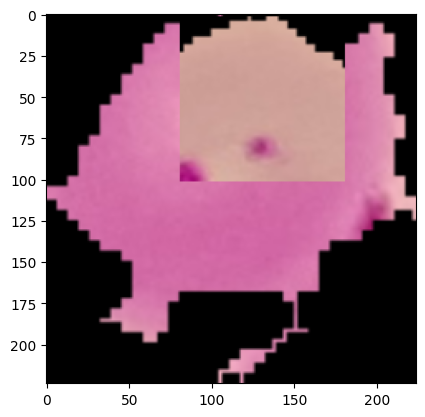

In [ ]:
original_image, label = next(iter(train_dataset))
print(label)
plt.imshow(original_image[0])


Albumentaion

In [ ]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-59ob3296
  Running command git clone --filter=blob:none --quiet https://github.com/albu/albumentations /tmp/pip-req-build-59ob3296
  Resolved https://github.com/albu/albumentations to commit 17f04e6db11b7a3cd5f2b667a99c5ce3b162f8c9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 136.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 328.8 MB/s eta 0:00:00
  Created wheel for albumentations: filename=albumentations-1.4.7-py3-none-any.whl size=155996 sha256=f282e97f0c638ac145420a53c516b6e8653717be0eb34cce586d776cef118676
  Stored in directory: /tmp/pip-ephem-wheel-cache-r6ejljdx/wheels/3c/df/16/b3d0d64428c9f25b1ab03989a2e574546d3336647946d31e56
Successfully built alb

In [ ]:
!pip install albumentations==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.7
    Uninstalling albumentations-1.4.7:
      Successfully uninstalled albumentations-1.4.7


In [ ]:
import albumentations as A
transforms = A.Compose(
    [
      A.Resize(img_size, img_size),

      A.OneOf([A.HorizontalFlip(),
                A.VerticalFlip(),], p = 0.3),

      A.RandomRotate90(),
      #A.RandomGridShuffle(grid=(3, 3), always_apply=False, p=0.5),
      A.RandomBrightnessContrast(brightness_limit=0.2,
                                contrast_limit=0.2,
                                always_apply=False, p=0.5),
      A.Cutout(num_holes=8, max_h_size=8, max_w_size=8, fill_value=0, always_apply=False, p=0.5),
      A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), always_apply=False, p=0.5),
])

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:688: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(


In [ ]:
def aug_albument(image):
  data = {"image":image}
  image = transforms(**data)
  image = image["image"]
  image = tf.cast(image/255., tf.float32)
  return image

In [ ]:
def process_data(image, label):
    aug_img = tf.numpy_function(func=aug_albument, inp=[image], Tout=tf.float32)
    return aug_img, label

In [ ]:
BATCH_SIZE = 32
train_dataset = (
    train_dataset
    .shuffle(buffer_size = 1024, reshuffle_each_iteration = True)
    .map(process_data)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

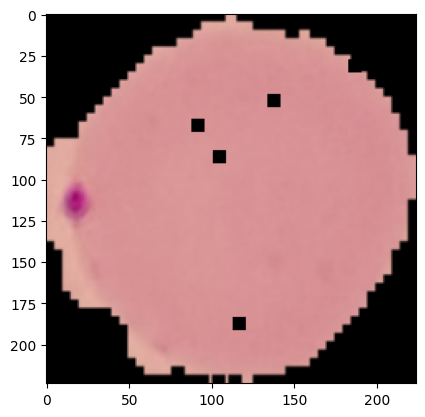

In [ ]:
im, _ = next(iter(train_dataset))
plt.imshow(im[0])

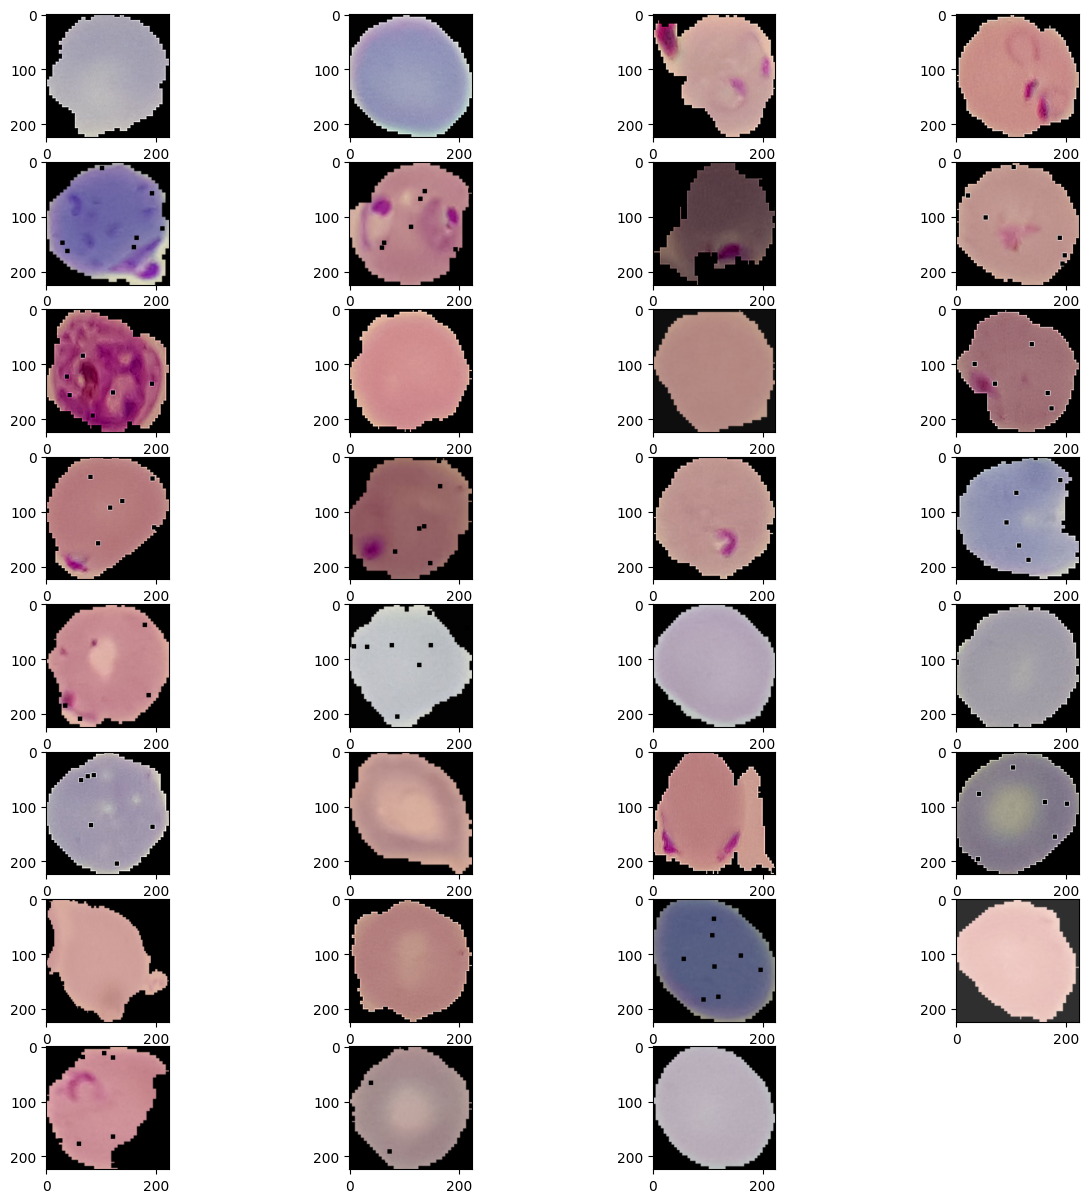

In [ ]:
plt.figure(figsize=(15,15))

for i in range(1,32):
  plt.subplot(8,4,i)
  plt.imshow(im[i])

In [ ]:
lennet_history_cutmix = lennet_model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 30,
    callbacks = [early_stopping]
)

Epoch 1/30


TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_file_ao4vk_f.py", line 10, in tf__call
        x = ag__.converted_call(ag__.ld(self).feature_extractor, (ag__.ld(x),), None, fscope)
    File "/tmp/__autograph_generated_filed10pe9t8.py", line 10, in tf__call
        x = ag__.converted_call(ag__.ld(self).Conv2D_1, (ag__.ld(x),), None, fscope)

    TypeError: Exception encountered when calling layer 'lenet_model_1' (type LenetModel).
    
    in user code:
    
        File "<ipython-input-10-d34cb3ae21de>", line 14, in call  *
            x = self.feature_extractor(x)
        File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "/tmp/__autograph_generated_filed10pe9t8.py", line 10, in tf__call
            x = ag__.converted_call(ag__.ld(self).Conv2D_1, (ag__.ld(x),), None, fscope)
    
        TypeError: Exception encountered when calling layer 'feature_extractor_2' (type FeatureExtractor).
        
        in user code:
        
            File "<ipython-input-9-a5af933f593e>", line 15, in call  *
                x = self.Conv2D_1(x)
            File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
                raise e.with_traceback(filtered_tb) from None
            File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 415, in _get_input_channel
                if input_shape.dims[channel_axis].value is None:
        
            TypeError: 'NoneType' object is not subscriptable
        
        
        Call arguments received by layer 'feature_extractor_2' (type FeatureExtractor):
          • x=tf.Tensor(shape=<unknown>, dtype=float32)
    
    
    Call arguments received by layer 'lenet_model_1' (type LenetModel):
      • x=tf.Tensor(shape=<unknown>, dtype=float32)


In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>